# 12-752: Data-Driven Building Energy Management
## Fall 2016, Carnegie Mellon University
### Final Project

Erjia Guan  
Yiming Chen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import pickle

%matplotlib inline

# Build DataFrame
## Step \#1 :
Load the ```temperature``` and the ```power consumption``` DataFrame.

In [2]:
temp_file = pd.read_csv('data/Temperature_data.csv')
temp_data = temp_file[temp_file['Location'] == 'Outside'].drop('Location', 1)
temp_data = temp_data.drop('BeaconId', 1)
temp_data['Time'] = pd.to_datetime(temp_data['Time'])
temp_data = temp_data.set_index(['Time'])

In [3]:
aggregate_file = pd.read_csv('data/Aggregated_data.csv', parse_dates=True, low_memory=False, names=['Time', 'Power'])
aggregate_data = aggregate_file.dropna()
t = aggregate_data['Time'].str[:-6]
t.name = 'TimeIndex'
aggregate_data = aggregate_data.drop('Time', 1).join(t)
# aggregate_data
aggregate_data['TimeIndex'] = pd.to_datetime(aggregate_data['TimeIndex'])
aggregate_data = aggregate_data.set_index(['TimeIndex'])
aggregate_data['Power'] = aggregate_data['Power'].astype(float)

## Step \#2 :
Resample the ```temperature``` and the ```power consumption``` DataFrames to one sample every one hour.

In [4]:
temp_data = temp_data.resample('1H').mean()
# print(temp_data.isnull().values.sum())
# print(temp_data[temp_data.isnull().any(axis=1)])
# print(temp_data)
aggregate_data = aggregate_data.resample('1H').mean()

## Step \#3 :
Create a new DataFrame called ```df``` which is an inner join of the ```temperature``` and ```power consumption``` datasets.

In [5]:
df = pd.concat([temp_data, aggregate_data], axis=1, join="inner")
df['Weekend'] = ((df.index.dayofweek) // 5 == 1).astype(float)
df['Hour'] = df.index.hour
df['Date'] = df.index.date
df = df.interpolate()
df

,Temperature,Power,Weekend,Hour,Date
2015-07-20 20:00:00,18.375000,142.988250,0.0,20,2015-07-20
2015-07-20 21:00:00,18.183333,272.315194,0.0,21,2015-07-20
2015-07-20 22:00:00,18.366667,179.647167,0.0,22,2015-07-20
2015-07-20 23:00:00,19.000000,116.072778,0.0,23,2015-07-20
2015-07-21 00:00:00,19.000000,63.311806,0.0,0,2015-07-21
2015-07-21 01:00:00,17.800000,89.389694,0.0,1,2015-07-21
2015-07-21 02:00:00,18.266667,91.064333,0.0,2,2015-07-21
2015-07-21 03:00:00,16.483333,56.474444,0.0,3,2015-07-21
2015-07-21 04:00:00,16.833333,72.033043,0.0,4,2015-07-21
2015-07-21 05:00:00,15.450000,105.927235,0.0,5,2015-07-21


# Patern of the dataset
The distribution of the whole dataset

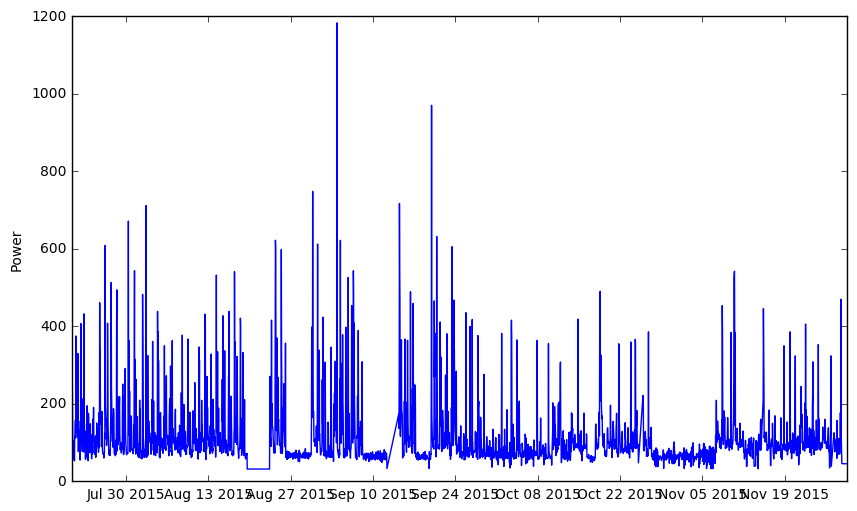

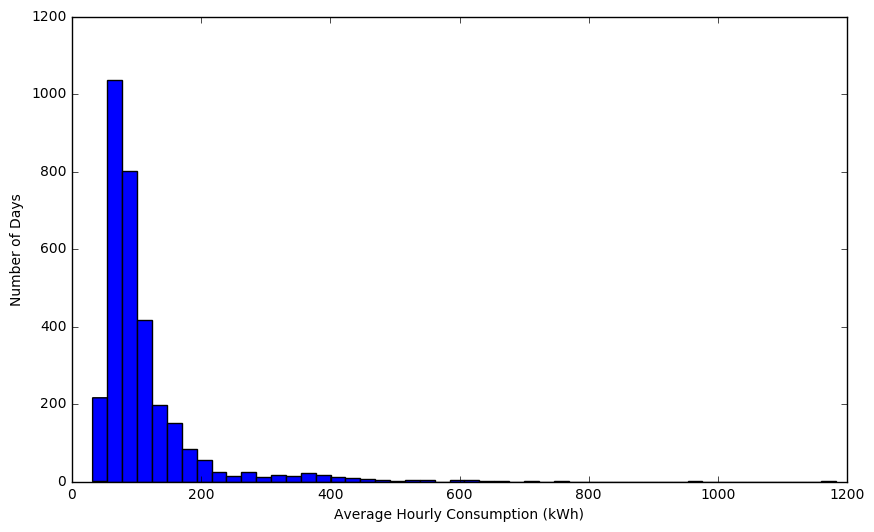

In [6]:
fig1 = plt.figure(figsize=(10,6))
ax1 = plt.plot(df['Power'])
plt.ylabel('Power')

# plotData = df.sort_values(['Temperature'], ascending = True)
# fig2 = plt.figure(figsize=(10,6))
# ax2 = plt.scatter(df['Temperature'], df['Power'],  color='blue', edgecolor='none')
# plt.xlabel('Temperature')
# plt.ylabel('Power')

fig2 = plt.figure(figsize=(10,6))
plt.hist(df['Power'], bins = 50)
plt.xlabel('Average Hourly Consumption (kWh)')
plt.ylabel('Number of Days')

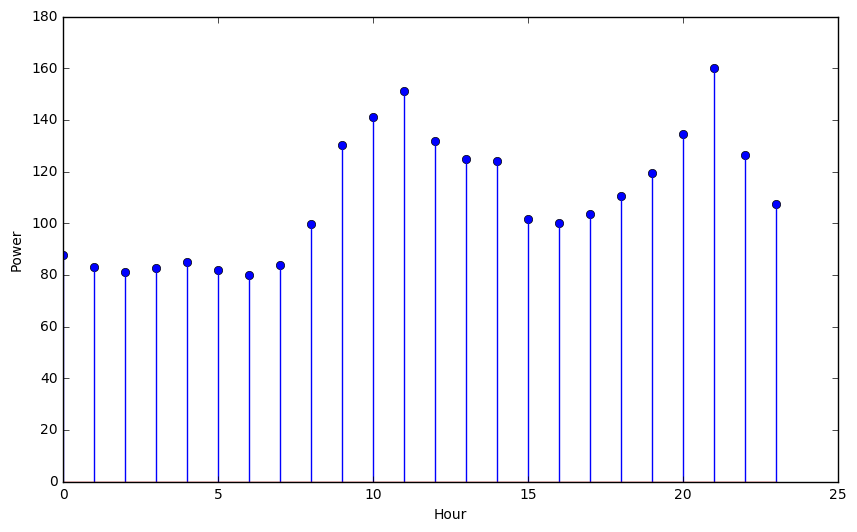

In [7]:
fig3 = plt.figure(figsize=(10,6))
plt.stem(df.groupby(df['Hour'])['Power'].mean())
plt.xlabel('Hour')
plt.ylabel('Power')

In [8]:
Grouped = df.groupby('Date').aggregate({'Temperature': np.mean,'Weekend': np.mean})
Grouped = Grouped.drop(Grouped.index[0])
Grouped = Grouped.drop(Grouped.index[len(Grouped)-1])

Feature = np.array([np.array(Grouped['Temperature'])]).T

i = 5
k = 0
Pow = []
while i < (len(df) - 15):
    Pow.append([])
    for h in range(24):
        i += 1
        Pow[k].append(df['Power'][i])
    k += 1
for i in range(len(Pow)):
    Pow[i] = np.array(Pow[i])
Pow = np.array(Pow)
Power = Pow

# Normalization
Since we are interested in weekdays/weekends, let's subtract the seasonal effects  
low-pass over 10 days

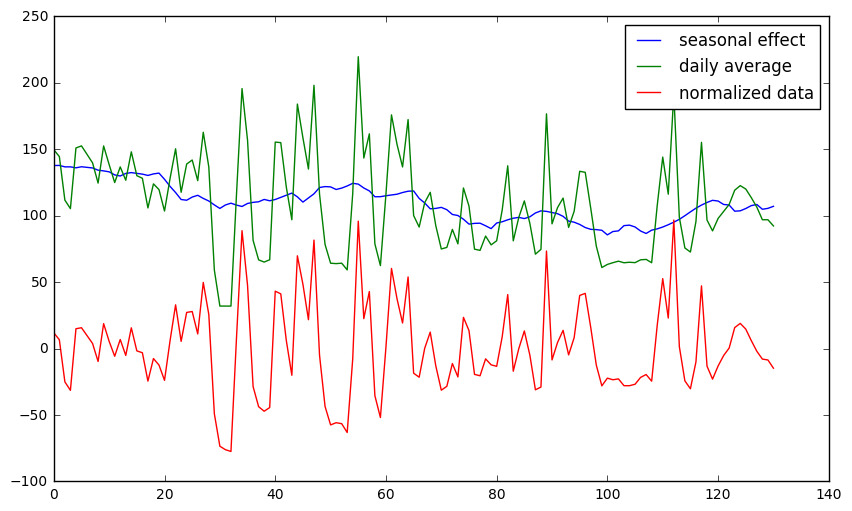

In [9]:
lp = 10
seasonal = []
for i in range(int(len(Pow))):
    seasonal.append(np.mean(Pow[np.max([i-lp,0]):i+lp,:]))
# print(seasonal)

fig4 = plt.figure(figsize=(10,6))
plt.plot(seasonal, label='seasonal effect')
plt.plot(np.mean(Pow,axis=1), label='daily average')

Pow = (Pow.T - seasonal).T
# print(Pow)
plt.plot(np.mean(Pow,axis=1), label='normalized data')
plt.legend()

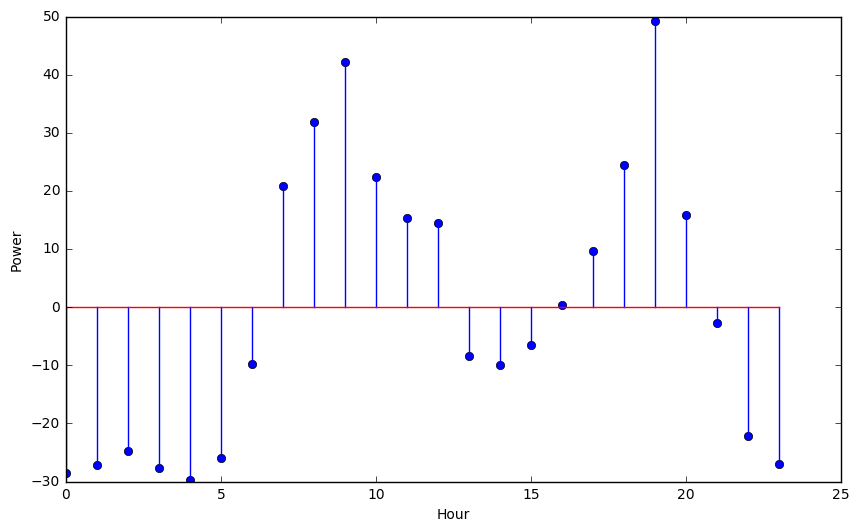

In [10]:
fig5 = plt.figure(figsize=(10,6))
plt.stem(np.mean(Pow, axis=0))
plt.xlabel('Hour')
plt.ylabel('Power')


# Regression
Discuss the reliability of regression by three different sets of this dataset.  
$\bullet$ The entire dataset  
$\bullet$ Two datasets seperated by weekend and weekday   
$\bullet$ Two datasets seperated by clusters  
$\bullet$ The whole dataset with two features (```Temperature``` and ```weekend```)

## The entire dataset

In [11]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth = 5)
clf = clf.fit(Feature, Power)

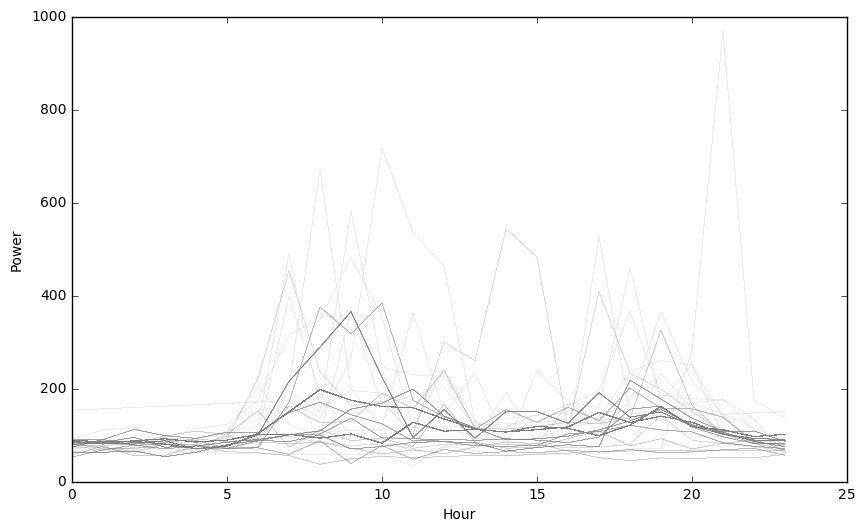

In [12]:
fig4 = plt.figure(figsize=(10,6))
for i in range(-150, 400):
    plt.plot(clf.predict(i/10).T.tolist(), color='grey', lw='0.1')
plt.xlabel('Hour')
plt.ylabel('Power')
plt.show()

In [13]:
from sklearn.cross_validation import KFold, cross_val_score
print(cross_val_score(clf, Feature, Power, cv = 3).mean()) 
# score = clf.score(Feature, Power)
# print(score)

-0.593893736508


## Two datasets seperated by weekend and weekday

In [14]:
WeekendFeature = []
WeekdayFeature = []
WeekendData = []
WeekdayData = []
for i in range(len(Pow)):
    if Grouped['Weekend'][Grouped.index[i]] == 1:
        WeekendData.append(Power[i])
        WeekendFeature.append(Grouped['Temperature'][i])
    else:
        WeekdayData.append(Power[i])
        WeekdayFeature.append(Grouped['Temperature'][i])
# print(WeekendFeature)
WeekendData = np.array(WeekendData)
WeekdayData = np.array(WeekdayData)
WeekendFeature = np.array(WeekendFeature)
WeekdayFeature = np.array(WeekdayFeature)
# print(len(WeekdayFeature))
# print(len(WeekendData))
WeekendFeature = WeekendFeature.reshape(37,1)
WeekdayFeature = WeekdayFeature.reshape(94,1)
WeekendData = WeekendData.reshape(37,24)
WeekdayData = WeekdayData.reshape(94,24)

In [15]:
clf1 = tree.DecisionTreeRegressor(max_depth=5)
clf1 = clf1.fit(WeekendFeature, WeekendData)
clf2 = tree.DecisionTreeRegressor(max_depth=5)
clf2 = clf2.fit(WeekdayFeature, WeekdayData)
# score1 = clf1.score(WeekendFeature, WeekendData)
# score2 = clf2.score(WeekdayFeature, WeekdayData)

In [16]:
# print(score1)
# print(score2)
print(cross_val_score(clf1, WeekendFeature, WeekendData, cv = 3).mean()) 
print(cross_val_score(clf2, WeekdayFeature, WeekdayData, cv = 3).mean()) 

-0.979018442961
-0.763276454562


## Two datasets seperated by clusters

In [17]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=2).fit(Pow)

40
91
The number of real weekends: 37 
The number of real weekdays: 94


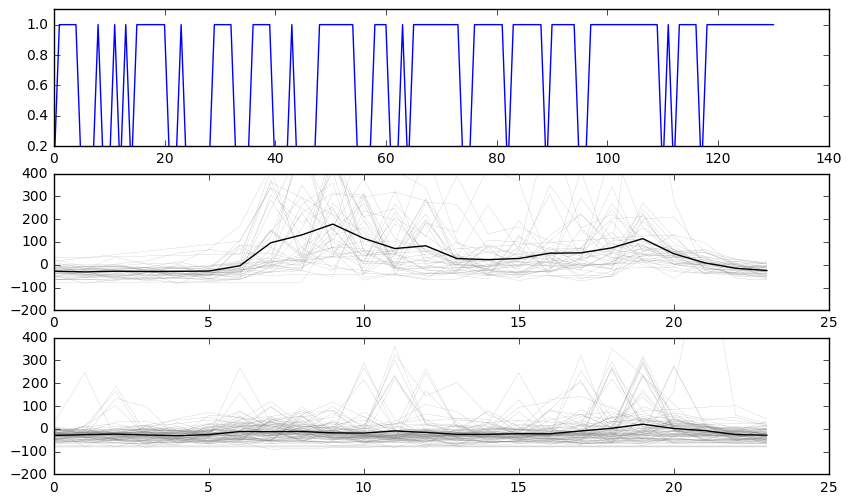

In [18]:
cluster_assignments = clusters.predict(Pow)
fig5 = plt.figure(figsize=(10,6))
plt.subplot(2+1,1,1)
plt.plot(cluster_assignments[:140])
plt.ylim([0.2,1.1])

for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(3,1,cluster_id+2)
    cluster_members = Pow[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')
    plt.ylim([-200,400])

WeekendSum = np.array(Grouped['Weekend'])
print("The number of real weekends: %d \nThe number of real weekdays: %d" % (WeekendSum.sum(), len(WeekendSum) - WeekendSum.sum()))
# print(cluster_assignments)

In [19]:
e = 0
for i in range(len(cluster_assignments)):
    if WeekendSum[i] + cluster_assignments[i] == 1:
        e = e + 1
# Whether the cluster is same as the criterion of weekends
print("The number of sets that cluster is same as the class of weekends: " + str(e))

The number of sets that cluster is same as the class of weekends: 88


In [20]:
Pow1 = []
Pow2 = []
Feature1 = []
Feature2 = []

for i in range(len(Pow)):
    if cluster_assignments[i] == 0:
        Pow1.append(Power[i])
        Feature1.append(Feature[i])
    else:
        Pow2.append(Power[i])
        Feature2.append(Feature[i])
# print(len(Pow1))
# print(len(Feature1))

In [21]:
clf3 = tree.DecisionTreeRegressor(max_depth = 5)
clf4 = tree.DecisionTreeRegressor(max_depth = 5)

clf3 = clf3.fit(Feature1, Pow1)
clf4 = clf4.fit(Feature2, Pow2)

In [22]:
# score3 = clf3.score(Feature1, Pow1)
# score4 = clf4.score(Feature2, Pow2)

# print(score3)
# print(score4)
print(cross_val_score(clf3, Feature1, Pow1, cv = 3).mean()) 
print(cross_val_score(clf4, Feature2, Pow2, cv = 3).mean()) 

-1.2885035252
-1.41777035384


### Three clusters

In [23]:
# clusters2 = KMeans(n_clusters=3).fit(Pow)
# cluster_assignments2 = clusters2.predict(Pow)
# fig6 = plt.figure(figsize=(10,8))
# plt.subplot(3+1,1,1)
# plt.plot(cluster_assignments2[:140])
# plt.ylim([0.2,2.1])

# for cluster_id2 in range(len(clusters2.cluster_centers_)):
#     plt.subplot(4,1,cluster_id2+2)
#     cluster_members2 = Pow[cluster_assignments2==cluster_id2,:]
#     print(len(cluster_members2))
#     for i in range(len(cluster_members2)):
#         plt.plot(cluster_members2[i,:], color='grey', lw='0.1')
#     plt.plot(clusters2.cluster_centers_[cluster_id2,:], color='k', lw='1')
#     plt.ylim([-200,400])

# Weekend = np.array(Grouped['Weekend'])
# print("The number of real weekends: %d \nThe number of real weekdays: %d" % (Weekend.sum(), len(Weekend) - Weekend.sum()))
# # print(cluster_assignments)

## The whole dataset with two features (Temperature and weekend)

In [24]:
clf5 = tree.DecisionTreeRegressor(max_depth=5)
clf5 = clf5.fit(Grouped, Power)

In [25]:
# score5 = clf5.score(Grouped, Power)
# print(score5)
print(cross_val_score(clf5, Grouped, Power, cv = 3).mean()) 

-0.937804156802


# Result

If we just use the whole dataset to do the regression, the scores is calculated by itself:


The entire dataset: -1.01675510796


Seperated datasets by weekend: -1.56717292269 / -1.36872262545  
Weekend: 37; Weekday: 94  


Seperated datasets by clusters: -0.734156610395 / -0.297475512218  
1: 40; 2: 91  


two features: -1.07396103334

In [26]:
print(cross_val_score(clf, Feature, Power, cv = 4).mean()) 
print(cross_val_score(clf1, WeekendFeature, WeekendData, cv = 4).mean()) 
print(cross_val_score(clf2, WeekdayFeature, WeekdayData, cv = 4).mean()) 
print(cross_val_score(clf3, Feature1, Pow1, cv = 4).mean()) 
print(cross_val_score(clf4, Feature2, Pow2, cv = 4).mean()) 
print(cross_val_score(clf5, Grouped, Power, cv = 4).mean()) 

-1.01675510796
-1.56717292269
-1.36872262545
-0.734156610395
-0.297475512218
-1.07396103334


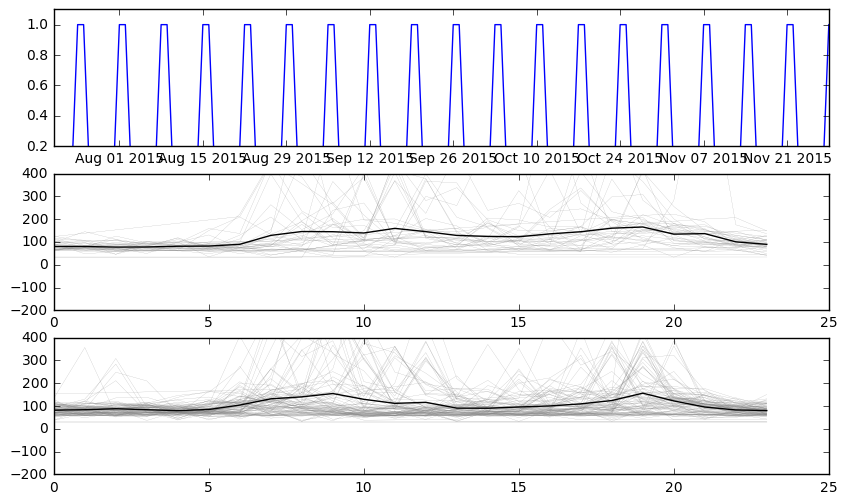

In [27]:
fig5 = plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(Grouped['Weekend'][:140])
# plt.xticks(np.arange(140))
plt.ylim([0.2,1.1])

plt.subplot(3,1,2)
for i in range(len(WeekendData)):
    plt.plot(WeekendData[i], color='grey', lw='0.1')
    plt.ylim([-200,400])
plt.plot(np.mean(WeekendData, axis=0), color='k', lw='1')
plt.subplot(3,1,3)
for i in range(len(WeekdayData)):
    plt.plot(WeekdayData[i], color='grey', lw='0.1')
    plt.ylim([-200,400])
plt.plot(np.mean(WeekdayData, axis=0), color='k', lw='1')